# Inspect processed data from Ashley 21 Mar 2018

**Objectives:**
* make some swarmplots of the logcpm processed data from Ashley

### **Data origin**

**AshleyLu**: Those are the two tables we currently use
```
/ddn1/vol1/staging/leuven/stg_00002/cbd/projects/BDS_SpatialTranscriptomics/001.merged/counts/raw_filtered.pickle
/ddn1/vol1/staging/leuven/stg_00002/cbd/projects/BDS_SpatialTranscriptomics/001.merged/counts/logcpm_merge_20180212.pickle
```
* notebook to produce the logcpm_merge file: `normalisation_counts_20180212`
* Downloaded to: `/media/tmo/data/work/datasets/02_ST/ashley_21.03.2018/`

In [1]:
import pandas as pd
import numpy as np
import os
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

sns.set(style="whitegrid")

---

### **Read the DataFrames**

In [2]:
wd = '/media/tmo/data/work/datasets/02_ST/ashley_21.03.2018/'

raw_filtered_path = wd + 'raw_filtered.pickle'
logcpm_merge_path = wd + 'logcpm_merge_20180212.pickle'

In [3]:
raw_filtered_df = pickle.load(open(raw_filtered_path, "rb"))

In [4]:
raw_filtered_df.head()

-343C11.2  00R_AC107638.2  0610005C13Rik  0610006L08Rik  \
N05_C2__20_6        0.0             0.0            0.0            0.0   
N05_C2__17_6        0.0             0.0            0.0            0.0   
N05_C2__16_6        0.0             0.0            0.0            0.0   
N05_C2__19_6        0.0             0.0            0.0            0.0   
N05_C2__18_6        0.0             0.0            0.0            0.0   

              0610007P14Rik  0610009B22Rik  0610009E02Rik  0610009L18Rik  \
N05_C2__20_6            0.0            0.0            1.0            0.0   
N05_C2__17_6            2.0            1.0            0.0            0.0   
N05_C2__16_6            0.0            1.0            0.0            0.0   
N05_C2__19_6            7.0            0.0            0.0            0.0   
N05_C2__18_6            3.0            3.0            0.0            0.0   

              0610009O20Rik  0610010F05Rik    ...     n-R5s90  n-R5s92  \
N05_C2__20_6            0.0            0.0    ...         0.0      0.0   
N05_C2__17_6            0.0            0.0    ...         0.0      0.0   
N05_C2__16_6            1.0            0.0    ...         0.0      0.0   
N05_C2__19_6            1.0            1.0    ...         0.0      0.0   
N05_C2__18_6            0.0            5.0    ...         0.0      0.0   

              n-R5s93  n-R5s94  n-R5s95  n-R5s96  n-R5s97  n-R5s98  n-TSaga9  \
N05_C2__20_6      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
N05_C2__17_6      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
N05_C2__16_6      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
N05_C2__19_6      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
N05_C2__18_6      0.0      0.0      0.0      0.0      0.0      0.0       0.0   

              n-TStga1  
N05_C2__20_6       0.0  
N05_C2__17_6       0.0  
N05_C2__16_6       0.0  
N05_C2__19_6       0.0  
N05_C2__18_6       0.0  

[5 rows x 46454 columns]

In [5]:
logcpm_merge_df = pickle.load(open(logcpm_merge_path, "rb"))

In [6]:
logcpm_merge_df.index.name = 'spot_UID'

In [8]:
logcpm_merge_df.reset_index(inplace=True)

In [9]:
def add_slide_ID(df):
    df['slide_ID'] = df['spot_UID'].apply(lambda x: str(x).split('__')[0])
    
    return df

In [10]:
logcpm_merge_df = add_slide_ID(logcpm_merge_df)

In [11]:
logcpm_merge_df.head()

spot_UID  -343C11.2  00R_AC107638.2  0610005C13Rik  0610006L08Rik  \
0  N05_C2__20_6   2.982974        2.982974       2.982974       2.982974   
1  N05_C2__17_6   2.982974        2.982974       2.982974       2.982974   
2  N05_C2__16_6   2.982974        2.982974       2.982974       2.982974   
3  N05_C2__19_6   2.982974        2.982974       2.982974       2.982974   
4  N05_C2__18_6   2.982974        2.982974       2.982974       2.982974   

   0610007P14Rik  0610009B22Rik  0610009E02Rik  0610009L18Rik  0610009O20Rik  \
0       2.982974       2.982974       4.984943       2.982974       2.982974   
1       6.827059       5.924174       2.982974       2.982974       2.982974   
2       2.982974       5.609164       2.982974       2.982974       5.609164   
3       7.661385       2.982974       2.982974       2.982974       5.157746   
4       6.738947       6.738947       2.982974       2.982974       2.982974   

     ...      n-R5s93   n-R5s94   n-R5s95   n-R5s96   n-R5s97   n-R5s98  \
0    ...     2.982974  2.982974  2.982974  2.982974  2.982974  2.982974   
1    ...     2.982974  2.982974  2.982974  2.982974  2.982974  2.982974   
2    ...     2.982974  2.982974  2.982974  2.982974  2.982974  2.982974   
3    ...     2.982974  2.982974  2.982974  2.982974  2.982974  2.982974   
4    ...     2.982974  2.982974  2.982974  2.982974  2.982974  2.982974   

   n-TSaga9  n-TStga1  sampleID  slide_ID  
0  2.982974  2.982974    N05_C2    N05_C2  
1  2.982974  2.982974    N05_C2    N05_C2  
2  2.982974  2.982974    N05_C2    N05_C2  
3  2.982974  2.982974    N05_C2    N05_C2  
4  2.982974  2.982974    N05_C2    N05_C2  

[5 rows x 46457 columns]

In [17]:
gene_columns = logcpm_merge_df.columns[1:46454+1]

In [24]:
gene_columns

Index(['-343C11.2', '00R_AC107638.2', '0610005C13Rik', '0610006L08Rik',
       '0610007P14Rik', '0610009B22Rik', '0610009E02Rik', '0610009L18Rik',
       '0610009O20Rik', '0610010F05Rik',
       ...
       'n-R5s90', 'n-R5s92', 'n-R5s93', 'n-R5s94', 'n-R5s95', 'n-R5s96',
       'n-R5s97', 'n-R5s98', 'n-TSaga9', 'n-TStga1'],
      dtype='object', length=46454)

In [34]:
gene_columns[minima > 3]

Index(['Cst3', 'Fth1', 'Gm10925', 'Gm13339', 'Gm13340', 'Gm13341', 'Gm28437',
       'Gm28438', 'Gm28661', 'Gm29216', 'Gm42418', 'Gnas', 'Ppp3ca', 'Sparcl1',
       'Supt7l', 'mt-Atp6', 'mt-Co1', 'mt-Co2', 'mt-Co3', 'mt-Cytb', 'mt-Nd1',
       'mt-Nd2', 'mt-Nd3', 'mt-Nd4', 'mt-Nd5', 'mt-Rnr1', 'mt-Rnr2'],
      dtype='object')

In [32]:
%%time
minima = logcpm_merge_df[gene_columns].min()

CPU times: user 5.27 s, sys: 3.94 s, total: 9.22 s
Wall time: 9.21 s


In [33]:
minima.value_counts()

2.982974     46357
2.982974        70
10.382651        1
9.556767         1
7.783619         1
12.164486        1
11.365652        1
10.513312        1
11.658587        1
11.980309        1
8.371350         1
7.923518         1
7.531659         1
11.044458        1
8.682580         1
11.994886        1
7.318592         1
9.693982         1
10.872654        1
6.357570         1
7.686509         1
6.329034         1
7.032615         1
10.816603        1
12.882449        1
10.445079        1
11.695971        1
9.538029         1
7.890007         1
dtype: int64

---

### **Plot gene expression swarmplots**

In [36]:
def plot_gene_swarm_by_slide(df, gene):
    fig, ax = plt.subplots(figsize=(50, 12))
    
    data = df[['slide_ID', gene]]
    
    slides = df['slide_ID'].unique()
    slides.sort()
    
    g = sns.swarmplot(data=data, x='slide_ID', y=gene, palette="tab20", order=slides)
    g.set_xticklabels(rotation=90, labels=slides)

    plt.show()

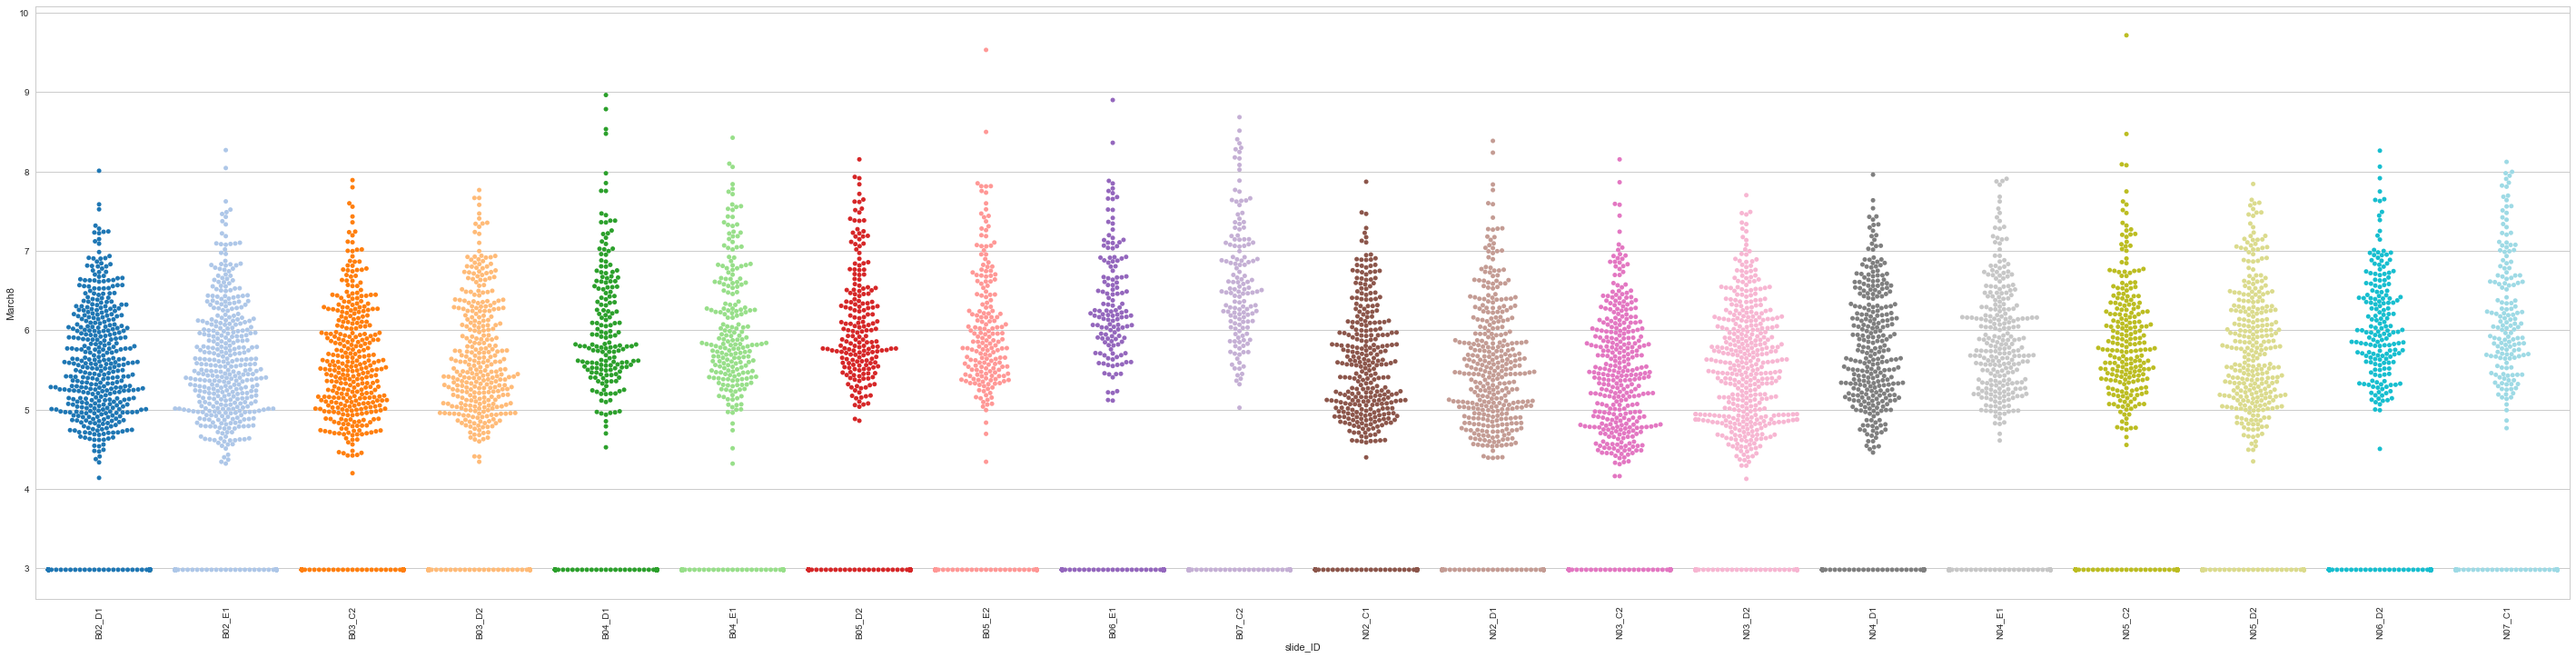

In [27]:
plot_gene_swarm_by_slide(logcpm_merge_df, 'March8')

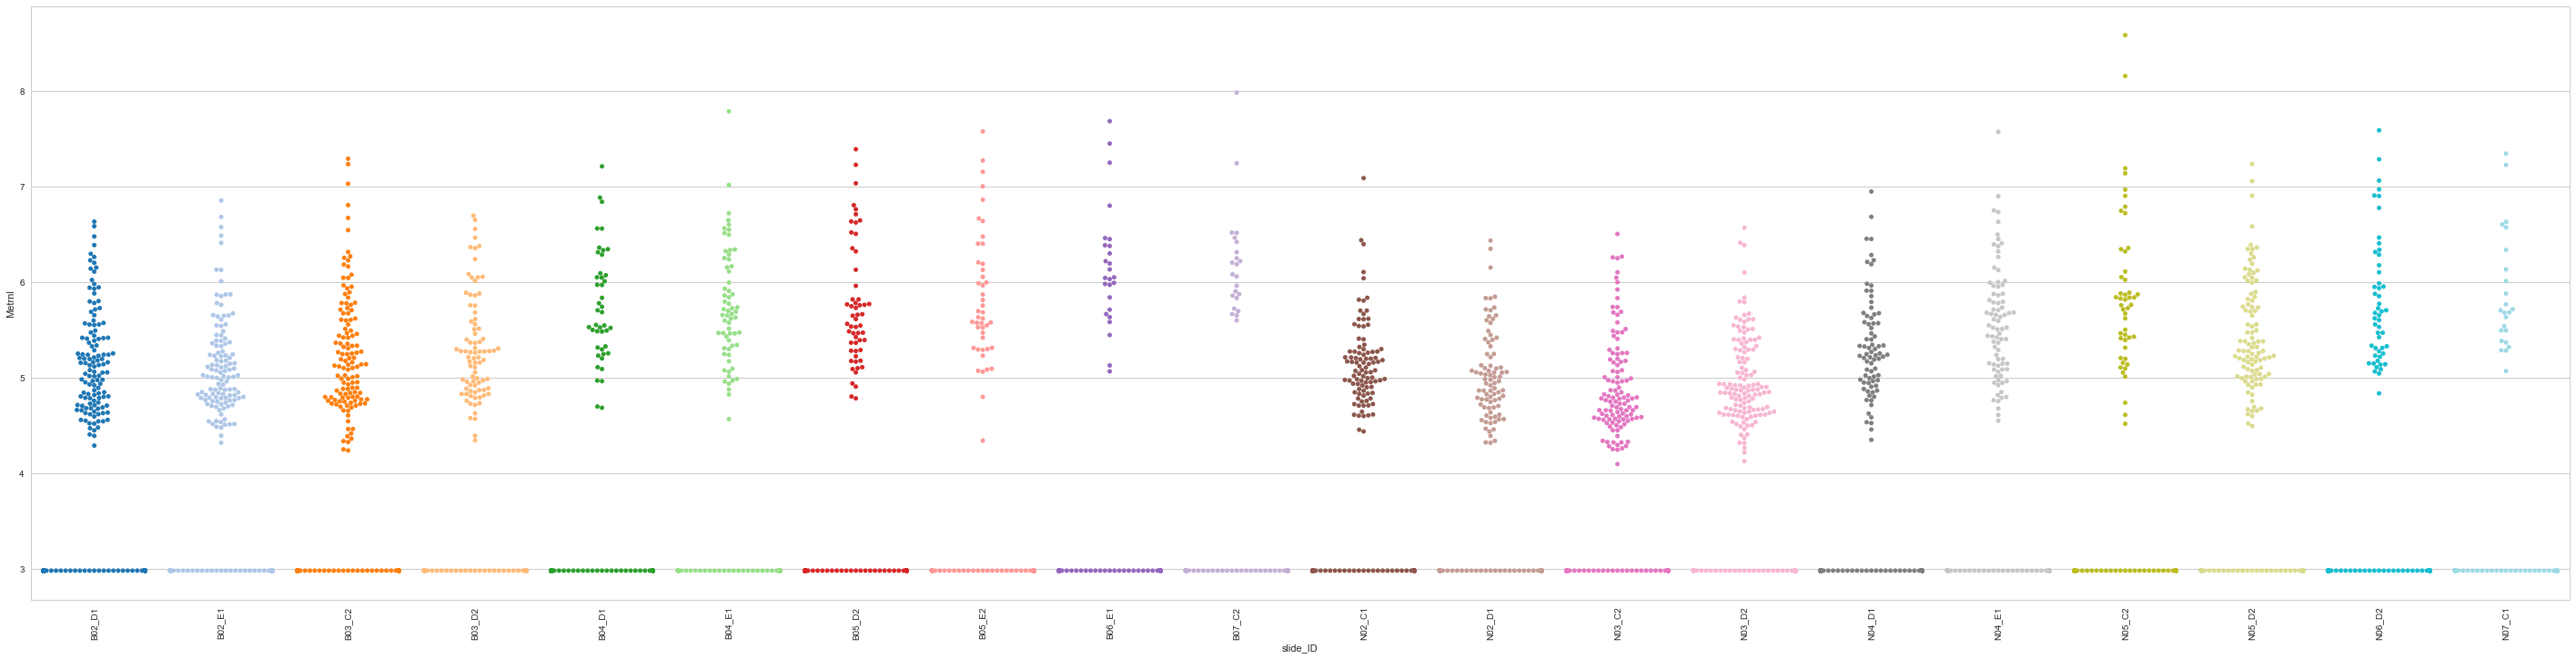

In [28]:
plot_gene_swarm_by_slide(logcpm_merge_df, 'Metrnl')

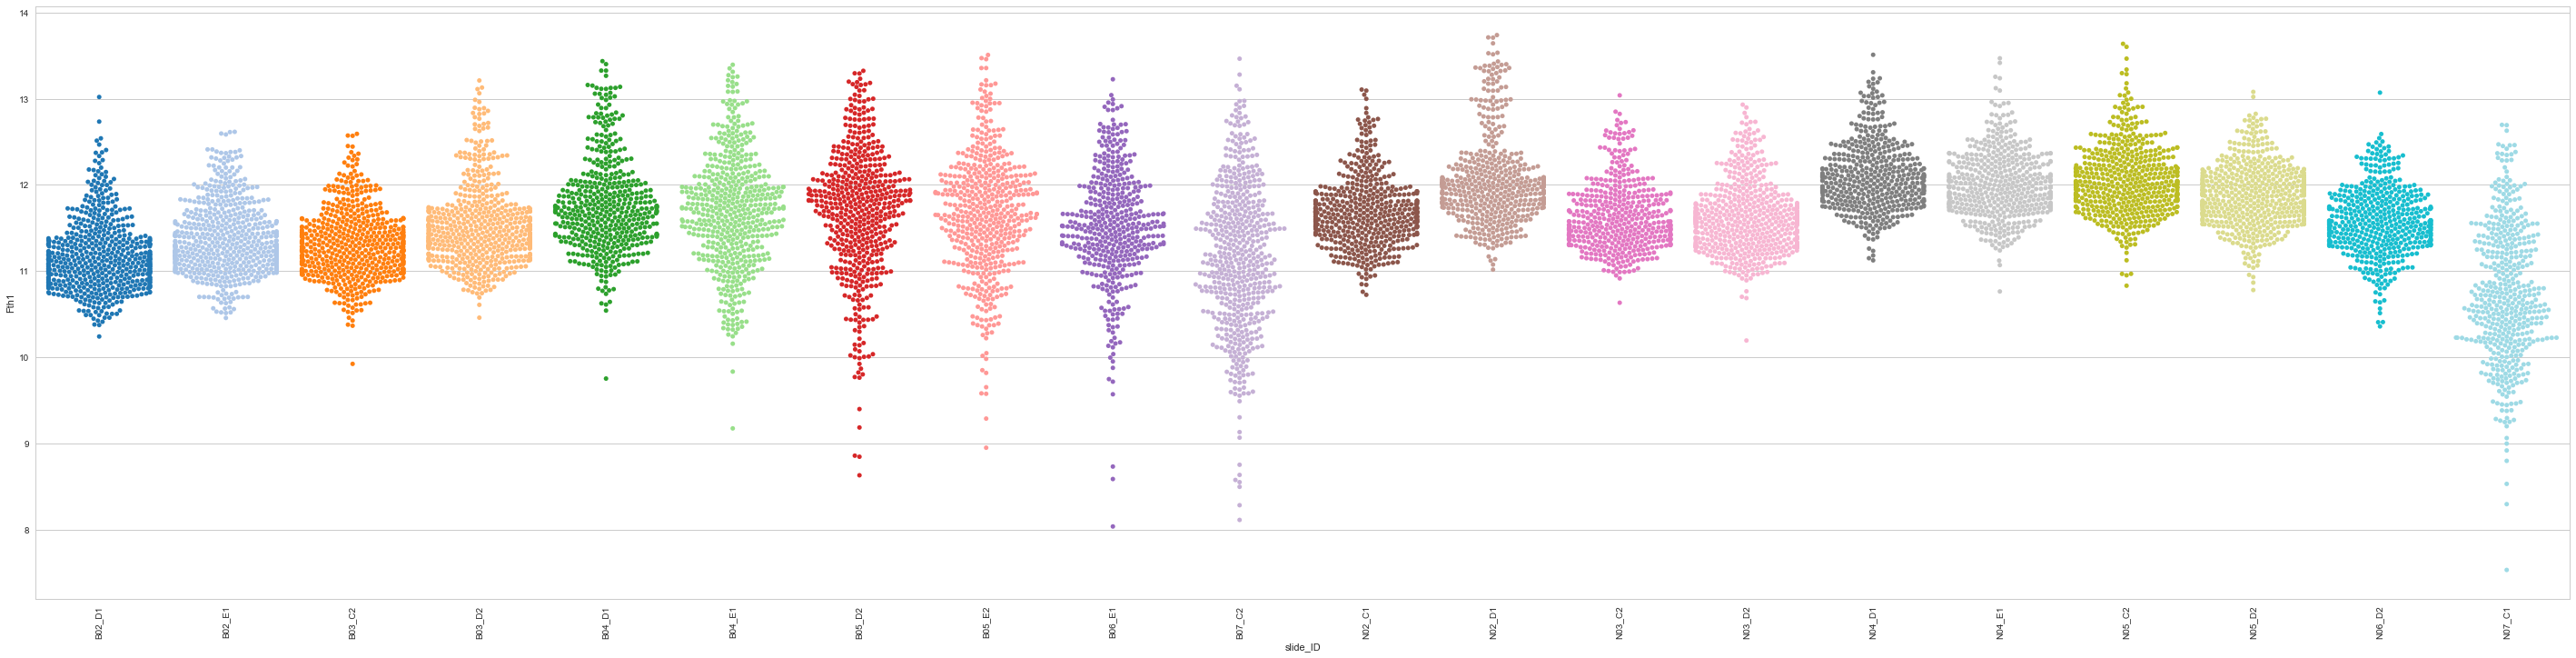

In [37]:
plot_gene_swarm_by_slide(logcpm_merge_df, 'Fth1')

---

### **Experiment**

* https://f1000research.com/posters/4-1041
* `pip install NaiveDE`
* `pip install --upgrade patsy`

In [45]:
raw_expression_df = raw_filtered_df[gene_columns].astype(np.int)

In [46]:
raw_expression_df.head()

-343C11.2  00R_AC107638.2  0610005C13Rik  0610006L08Rik  \
N05_C2__20_6          0               0              0              0   
N05_C2__17_6          0               0              0              0   
N05_C2__16_6          0               0              0              0   
N05_C2__19_6          0               0              0              0   
N05_C2__18_6          0               0              0              0   

              0610007P14Rik  0610009B22Rik  0610009E02Rik  0610009L18Rik  \
N05_C2__20_6              0              0              1              0   
N05_C2__17_6              2              1              0              0   
N05_C2__16_6              0              1              0              0   
N05_C2__19_6              7              0              0              0   
N05_C2__18_6              3              3              0              0   

              0610009O20Rik  0610010F05Rik    ...     n-R5s90  n-R5s92  \
N05_C2__20_6              0              0    ...           0        0   
N05_C2__17_6              0              0    ...           0        0   
N05_C2__16_6              1              0    ...           0        0   
N05_C2__19_6              1              1    ...           0        0   
N05_C2__18_6              0              5    ...           0        0   

              n-R5s93  n-R5s94  n-R5s95  n-R5s96  n-R5s97  n-R5s98  n-TSaga9  \
N05_C2__20_6        0        0        0        0        0        0         0   
N05_C2__17_6        0        0        0        0        0        0         0   
N05_C2__16_6        0        0        0        0        0        0         0   
N05_C2__19_6        0        0        0        0        0        0         0   
N05_C2__18_6        0        0        0        0        0        0         0   

              n-TStga1  
N05_C2__20_6         0  
N05_C2__17_6         0  
N05_C2__16_6         0  
N05_C2__19_6         0  
N05_C2__18_6         0  

[5 rows x 46454 columns]

In [43]:
import NaiveDE

In [50]:
total_counts_df = pd.DataFrame(raw_expression_df.sum(axis=1), columns=['total_counts'])

In [52]:
total_counts_df.head()

total_counts
N05_C2__20_6         42084
N05_C2__17_6         18933
N05_C2__16_6         24446
N05_C2__19_6         35982
N05_C2__18_6         30331

In [77]:
%%time
df = raw_expression_df
dfm = NaiveDE.stabilize(df.T).T

CPU times: user 35.3 s, sys: 9.7 s, total: 45 s
Wall time: 42.3 s


In [78]:
%%time
res = NaiveDE.regress_out(total_counts_df, dfm.T, 'np.log(total_counts)').T

CPU times: user 1min 20s, sys: 15.5 s, total: 1min 36s
Wall time: 30.4 s


In [79]:
res.head()

-343C11.2  00R_AC107638.2  0610005C13Rik  0610006L08Rik  \
spot_UID                                                                
N05_C2__20_6  -0.221779       -0.319460      -0.283909      -0.262798   
N05_C2__17_6  -0.221726       -0.312079      -0.279195      -0.259668   
N05_C2__16_6  -0.221743       -0.314440      -0.280703      -0.260669   
N05_C2__19_6  -0.221769       -0.318012      -0.282984      -0.262184   
N05_C2__18_6  -0.221757       -0.316434      -0.281976      -0.261514   

              0610007P14Rik  0610009B22Rik  0610009E02Rik  0610009L18Rik  \
spot_UID                                                                   
N05_C2__20_6      -7.865274      -4.798444       0.332822      -1.830861   
N05_C2__17_6      -6.040530      -3.645274      -0.457760      -1.710096   
N05_C2__16_6      -7.475289      -3.755140      -0.463902      -1.748734   
N05_C2__19_6      -5.477404      -4.731100      -0.473192      -1.807177   
N05_C2__18_6      -6.073643      -3.101143      -0.469086      -1.781346   

              0610009O20Rik  0610010F05Rik    ...      n-R5s90   n-R5s92  \
spot_UID                                      ...                          
N05_C2__20_6      -2.994092      -6.370233    ...    -0.222562 -0.221014   
N05_C2__17_6      -2.786062      -5.908928    ...    -0.222450 -0.221018   
N05_C2__16_6      -2.042842      -6.056521    ...    -0.222486 -0.221017   
N05_C2__19_6      -2.143516      -5.469986    ...    -0.222540 -0.221015   
N05_C2__18_6      -2.908799      -4.201881    ...    -0.222517 -0.221016   

               n-R5s93   n-R5s94   n-R5s95   n-R5s96   n-R5s97   n-R5s98  \
spot_UID                                                                   
N05_C2__20_6 -0.229903 -0.217080 -0.223454 -0.227659 -0.223145 -0.223054   
N05_C2__17_6 -0.229240 -0.217379 -0.223275 -0.227165 -0.222989 -0.222905   
N05_C2__16_6 -0.229452 -0.217284 -0.223332 -0.227323 -0.223039 -0.222953   
N05_C2__19_6 -0.229773 -0.217139 -0.223419 -0.227562 -0.223115 -0.223025   
N05_C2__18_6 -0.229631 -0.217203 -0.223381 -0.227456 -0.223081 -0.222993   

              n-TSaga9  n-TStga1  
spot_UID                          
N05_C2__20_6 -0.224861 -0.246847  
N05_C2__17_6 -0.224576 -0.244913  
N05_C2__16_6 -0.224667 -0.245532  
N05_C2__19_6 -0.224805 -0.246468  
N05_C2__18_6 -0.224744 -0.246054  

[5 rows x 46454 columns]

In [62]:
res.index.name = 'spot_UID'

In [63]:
res.reset_index(inplace=True)

In [65]:
res = add_slide_ID(res)

In [68]:
res.head()

spot_UID  -343C11.2  00R_AC107638.2  0610005C13Rik  0610006L08Rik  \
0  N05_C2__20_6  -0.221779       -0.319460      -0.283909      -0.262798   
1  N05_C2__17_6  -0.221726       -0.312079      -0.279195      -0.259668   
2  N05_C2__16_6  -0.221743       -0.314440      -0.280703      -0.260669   
3  N05_C2__19_6  -0.221769       -0.318012      -0.282984      -0.262184   
4  N05_C2__18_6  -0.221757       -0.316434      -0.281976      -0.261514   

   0610007P14Rik  0610009B22Rik  0610009E02Rik  0610009L18Rik  0610009O20Rik  \
0      -7.865274      -4.798444       0.332822      -1.830861      -2.994092   
1      -6.040530      -3.645274      -0.457760      -1.710096      -2.786062   
2      -7.475289      -3.755140      -0.463902      -1.748734      -2.042842   
3      -5.477404      -4.731100      -0.473192      -1.807177      -2.143516   
4      -6.073643      -3.101143      -0.469086      -1.781346      -2.908799   

     ...      n-R5s92   n-R5s93   n-R5s94   n-R5s95   n-R5s96   n-R5s97  \
0    ...    -0.221014 -0.229903 -0.217080 -0.223454 -0.227659 -0.223145   
1    ...    -0.221018 -0.229240 -0.217379 -0.223275 -0.227165 -0.222989   
2    ...    -0.221017 -0.229452 -0.217284 -0.223332 -0.227323 -0.223039   
3    ...    -0.221015 -0.229773 -0.217139 -0.223419 -0.227562 -0.223115   
4    ...    -0.221016 -0.229631 -0.217203 -0.223381 -0.227456 -0.223081   

    n-R5s98  n-TSaga9  n-TStga1  slide_ID  
0 -0.223054 -0.224861 -0.246847    N05_C2  
1 -0.222905 -0.224576 -0.244913    N05_C2  
2 -0.222953 -0.224667 -0.245532    N05_C2  
3 -0.223025 -0.224805 -0.246468    N05_C2  
4 -0.222993 -0.224744 -0.246054    N05_C2  

[5 rows x 46456 columns]

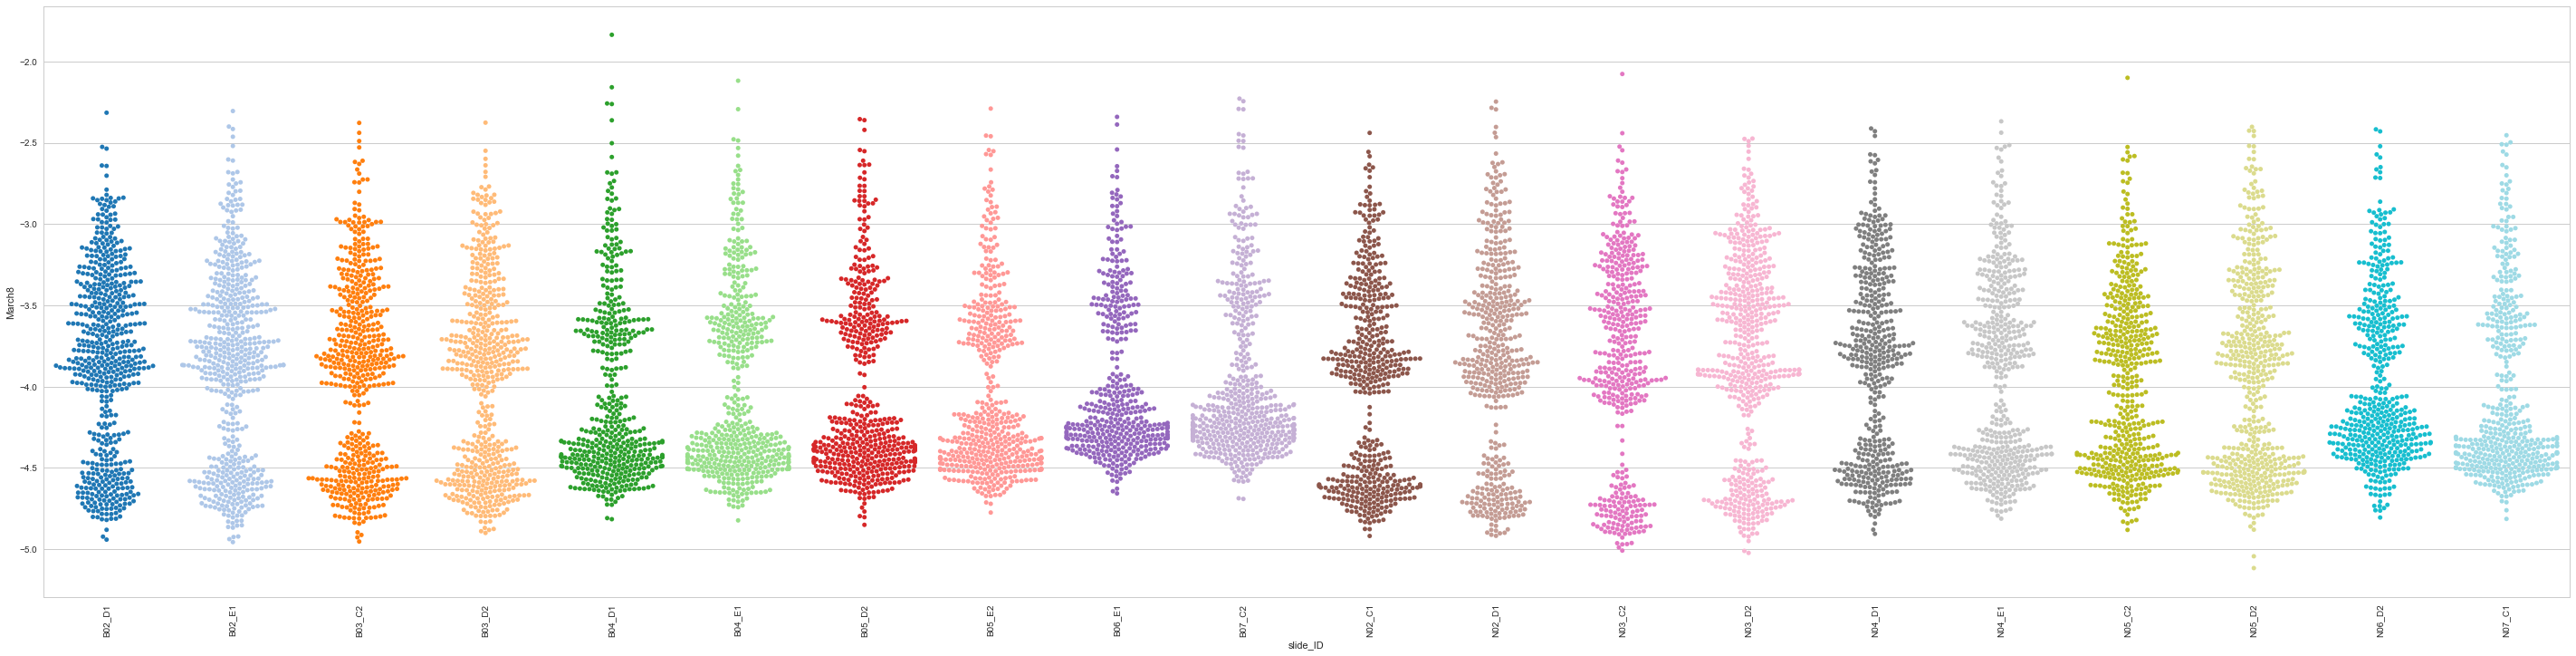

In [67]:
plot_gene_swarm_by_slide(res, 'March8')

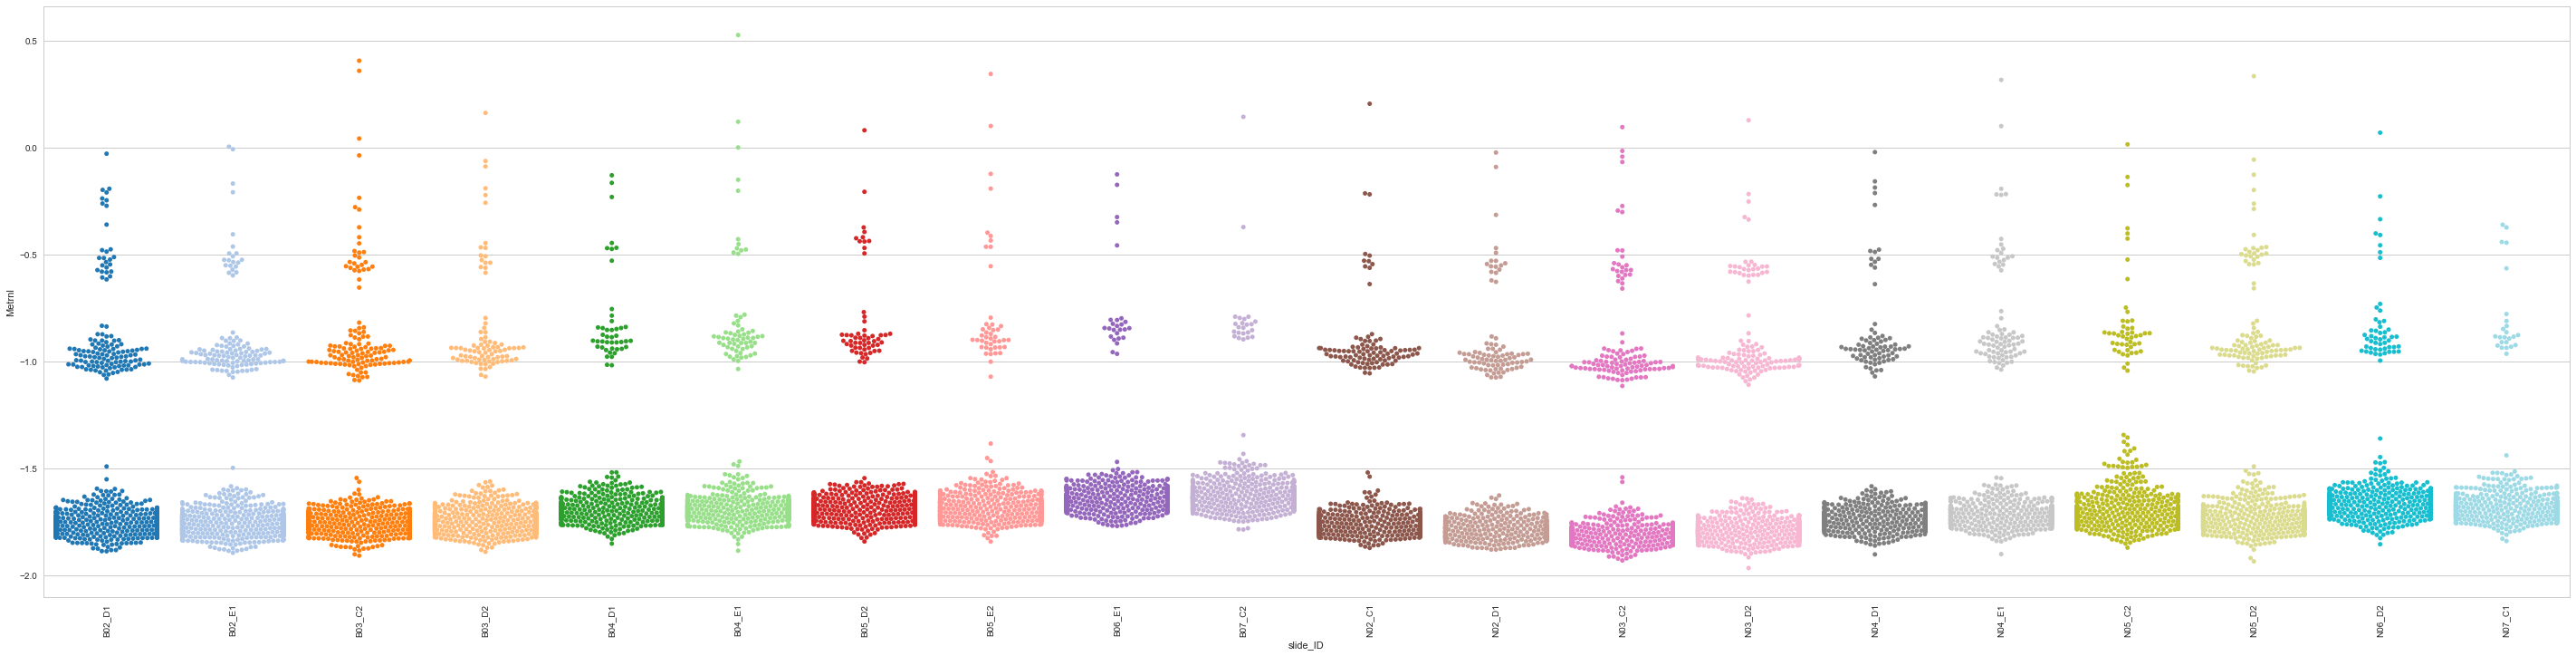

In [69]:
plot_gene_swarm_by_slide(res, 'Metrnl')

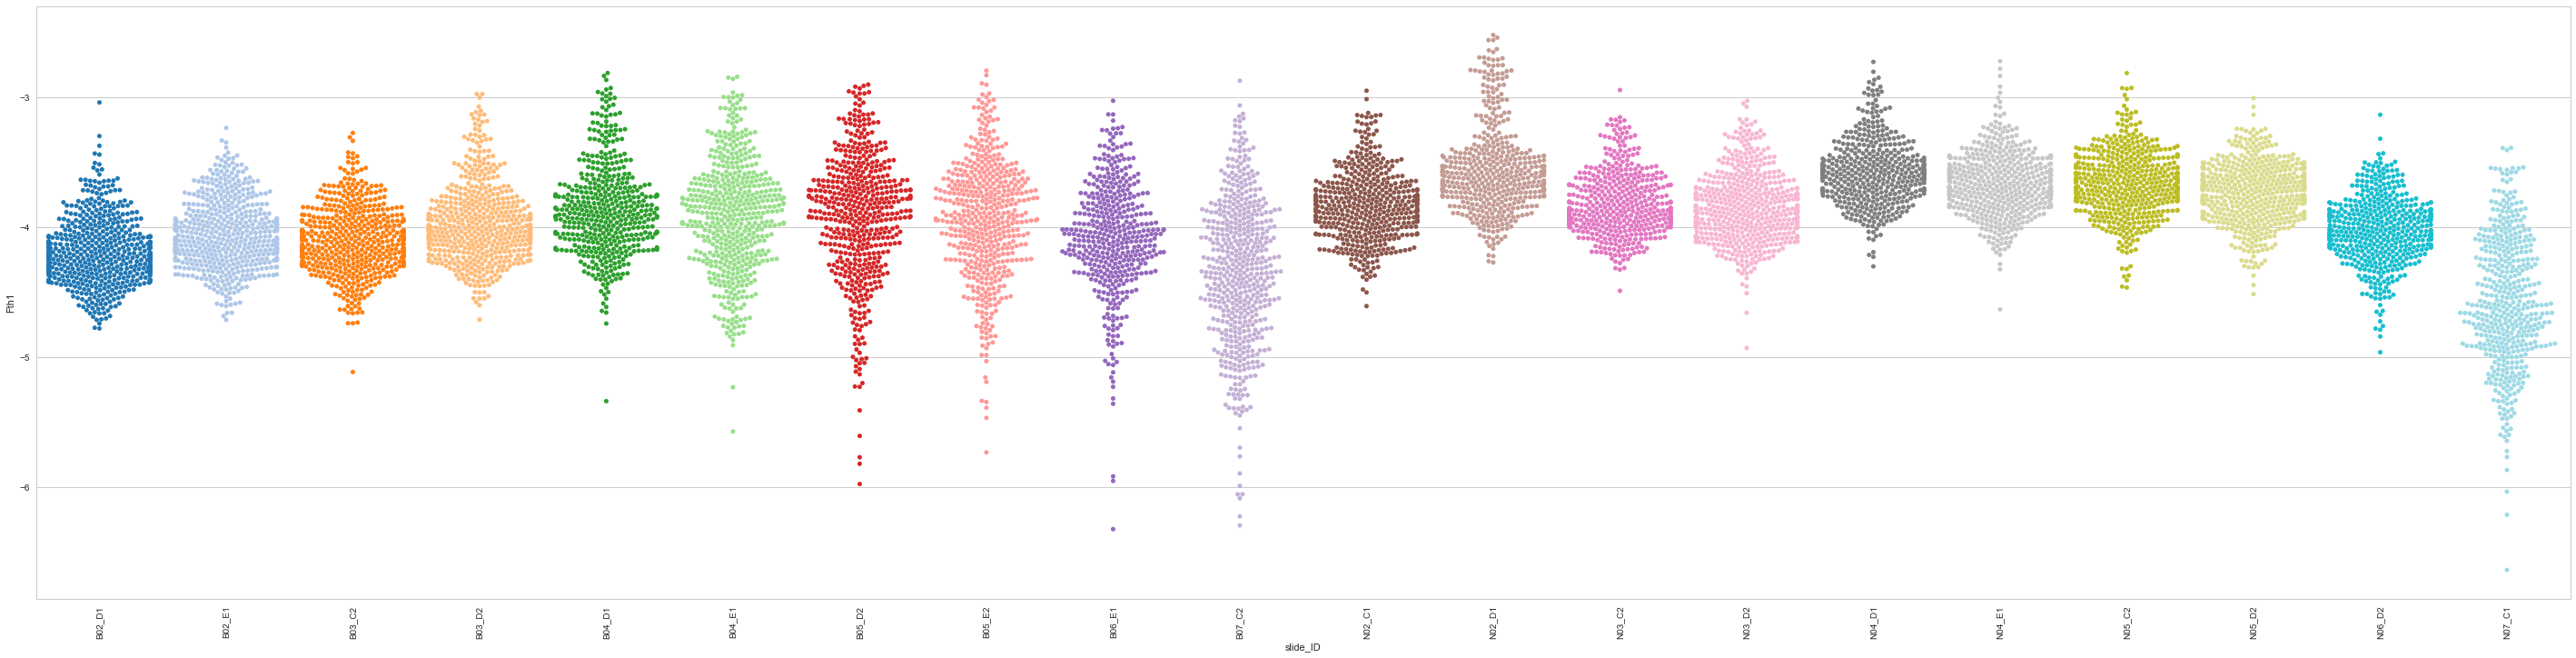

In [70]:
plot_gene_swarm_by_slide(res, 'Fth1')

### **Observations**

* logcpm with edgeR still looks better
* the smeared out "0" distributions might inflict a batch effect
* interesting as an experiment, but better to proceed with logcpm for now